## Binary Search Tree Test cases

Generated using ChatGPT

Overview
- Intialize
- Insert
- Remove
- Min and Max 
- isBalanced
- Performance Test O(n^2): Worst-case scenario - Large BST - 1 million nodes
- Performance Test O(log n): Large BST - 100 million nodes

### Initialise

In [1]:
import sys
import os
import unittest
import time

sys.path.append(os.path.abspath(".."))

from datastructures.BinarySearchTree import BinarySearchTree

### Insert

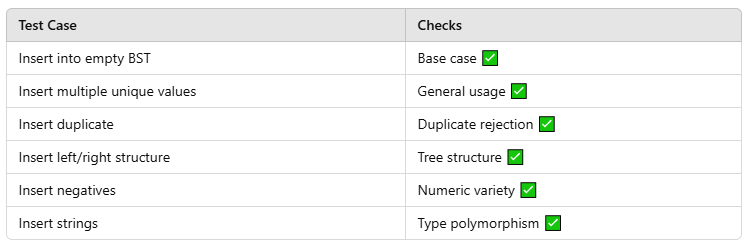

In [2]:
class TestBSTInsert(unittest.TestCase):

    def test_insert_into_empty_tree(self):
        """Insert a single value into an empty BST."""
        bst = BinarySearchTree()
        self.assertTrue(bst.insert(10))
        self.assertEqual(bst.size(), 1)
        self.assertTrue(bst.contains(10))

    def test_insert_multiple_unique_values(self):
        """Insert multiple unique values in BST."""
        bst = BinarySearchTree()
        values = [10, 5, 15, 3, 7, 12, 17]
        for value in values:
            self.assertTrue(bst.insert(value))
        self.assertEqual(bst.size(), len(values))
        for value in values:
            self.assertTrue(bst.contains(value))

    def test_insert_duplicate_value(self):
        """Inserting a duplicate value should return False and not change size."""
        bst = BinarySearchTree()
        bst.insert(10)
        result = bst.insert(10)
        self.assertFalse(result)
        self.assertEqual(bst.size(), 1)

    def test_insert_left_and_right_children(self):
        """Insert values such that both left and right children are populated."""
        bst = BinarySearchTree()
        bst.insert(10)
        bst.insert(5)
        bst.insert(15)
        self.assertTrue(bst.contains(5))
        self.assertTrue(bst.contains(15))
        self.assertEqual(bst.size(), 3)

    def test_insert_with_negative_numbers(self):
        """Insert a mix of positive and negative values."""
        bst = BinarySearchTree()
        values = [-10, -20, -5, 0, 10]
        for val in values:
            self.assertTrue(bst.insert(val))
        self.assertEqual(bst.size(), len(values))
        for val in values:
            self.assertTrue(bst.contains(val))

    def test_insert_strings(self):
        """Insert string values to verify type generality."""
        bst = BinarySearchTree()
        strings = ["d", "a", "c", "b", "e"]
        for s in strings:
            self.assertTrue(bst.insert(s))
        self.assertEqual(bst.size(), len(strings))
        self.assertFalse(bst.insert("c"))  # duplicate
        self.assertEqual(bst.size(), len(strings))  # size remains unchanged

# Run test suite inside Jupyter
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestBSTInsert))

......
----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

### Remove

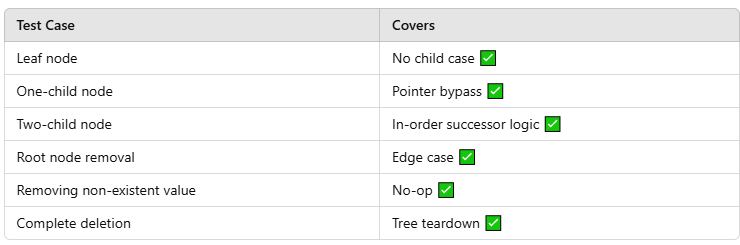

In [3]:
class TestBSTRemove(unittest.TestCase):

    def setUp(self):
        self.bst = BinarySearchTree()
        for val in [10, 5, 15, 3, 7, 12, 17]:
            self.bst.insert(val)

    def test_remove_leaf_node(self):
        """Remove a leaf node (no children)."""
        self.assertTrue(self.bst.remove(3))
        self.assertFalse(self.bst.contains(3))
        self.assertEqual(self.bst.size(), 6)

    def test_remove_node_with_one_child(self):
        """Remove a node with one child."""
        self.bst.insert(6)  # 7 gets left child
        self.assertTrue(self.bst.remove(7))
        self.assertFalse(self.bst.contains(7))
        self.assertEqual(self.bst.size(), 7)

    def test_remove_node_with_two_children(self):
        """Remove a node with two children (in-order successor replaces it)."""
        self.assertTrue(self.bst.remove(5))
        self.assertFalse(self.bst.contains(5))
        self.assertEqual(self.bst.size(), 6)

    def test_remove_root_node(self):
        """Remove the root node with children."""
        self.assertTrue(self.bst.remove(10))
        self.assertFalse(self.bst.contains(10))
        self.assertEqual(self.bst.size(), 6)

    def test_remove_non_existent_value(self):
        """Attempt to remove a value not in the BST."""
        self.assertFalse(self.bst.remove(100))
        self.assertEqual(self.bst.size(), 7)

    def test_remove_until_empty(self):
        """Remove all elements one by one until tree is empty."""
        values = [10, 5, 15, 3, 7, 12, 17]
        for val in values:
            self.assertTrue(self.bst.remove(val))
        self.assertTrue(self.bst.isEmpty())
        self.assertEqual(self.bst.size(), 0)

# Run inside Jupyter
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestBSTRemove))

......
----------------------------------------------------------------------
Ran 6 tests in 0.004s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

### Min and Max

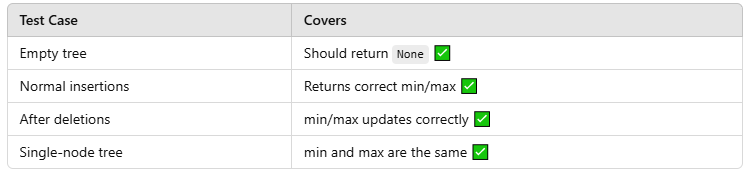

In [4]:
class TestBSTMinMax(unittest.TestCase):

    def test_min_max_on_empty_tree(self):
        """Test min and max on an empty tree."""
        bst = BinarySearchTree()
        self.assertIsNone(bst.min())
        self.assertIsNone(bst.max())

    def test_min_max_after_insertions(self):
        """Check correct min and max after multiple insertions."""
        bst = BinarySearchTree()
        values = [10, 5, 15, 3, 7, 12, 20]
        for val in values:
            bst.insert(val)

        self.assertEqual(bst.min(), 3)
        self.assertEqual(bst.max(), 20)

    def test_min_max_after_removal(self):
        """Ensure min and max update correctly after removals."""
        bst = BinarySearchTree()
        for val in [10, 5, 15, 3, 7, 12, 20]:
            bst.insert(val)

        bst.remove(3)  # min should now be 5
        bst.remove(20)  # max should now be 15
        self.assertEqual(bst.min(), 5)
        self.assertEqual(bst.max(), 15)

    def test_min_max_with_one_element(self):
        """Edge case: Tree with only one element."""
        bst = BinarySearchTree()
        bst.insert(42)
        self.assertEqual(bst.min(), 42)
        self.assertEqual(bst.max(), 42)

# Run inside Jupyter
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestBSTMinMax))


....
----------------------------------------------------------------------
Ran 4 tests in 0.002s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

### IsBalanced

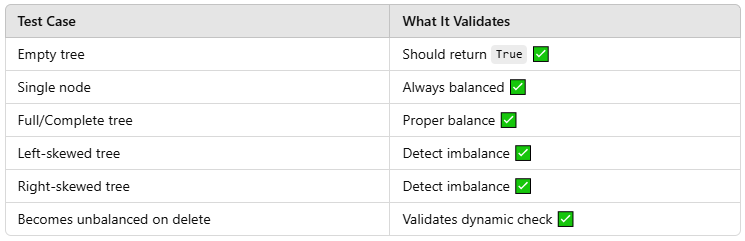

In [5]:
class TestBSTIsBalanced(unittest.TestCase):

    def test_balanced_empty_tree(self):
        """An empty tree is considered balanced."""
        bst = BinarySearchTree()
        self.assertTrue(bst.isBalanced())

    def test_single_node_tree_is_balanced(self):
        """A tree with one node is always balanced."""
        bst = BinarySearchTree()
        bst.insert(42)
        self.assertTrue(bst.isBalanced())

    def test_perfectly_balanced_tree(self):
        """A complete and balanced tree."""
        bst = BinarySearchTree()
        for val in [10, 5, 15, 3, 7, 12, 17]:
            bst.insert(val)
        self.assertTrue(bst.isBalanced())

    def test_left_skewed_tree(self):
        """Left-heavy unbalanced tree."""
        bst = BinarySearchTree()
        for val in [10, 9, 8, 7, 6]:
            bst.insert(val)
        self.assertFalse(bst.isBalanced())

    def test_right_skewed_tree(self):
        """Right-heavy unbalanced tree."""
        bst = BinarySearchTree()
        for val in [10, 11, 12, 13, 14]:
            bst.insert(val)
        self.assertFalse(bst.isBalanced())

    def test_balanced_after_removal(self):
        bst = BinarySearchTree()
        for val in [10, 5, 15, 3, 7, 12, 20]:
            bst.insert(val)
        bst.remove(5)
        bst.remove(3)
        bst.remove(1)
        bst.remove(2)
        bst.remove(7)
        self.assertFalse(bst.isBalanced())

# Run inside Jupyter
unittest.TextTestRunner().run(unittest.TestLoader().loadTestsFromTestCase(TestBSTIsBalanced))

......
----------------------------------------------------------------------
Ran 6 tests in 0.003s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

### Performance Test O(n^2): Large BST - Worst-case scenario - 1 million nodes - STOPPED after 12 hours - Not Completed

Right-skewed tree, essentially a linked list. O(n^2)

For 1 million nodes:  500 billion operations.

CPU Intel i7-6700K 4.0Ghz 4 cores 

RAM 32GB DD4 3200MHZ Dual Frequency 



In [6]:
def performance_test_large_bst(n=1_000_000):
    bst = BinarySearchTree()
    print(f"Inserting {n:,} nodes into BST...")
    
    start_time = time.time()

    # Insert ascending values (creates right-skewed tree, worst-case)
    for i in range(n):
        bst.insert(i)

    elapsed = time.time() - start_time
    print(f"Insertion complete in {elapsed:.2f} seconds")
    print(f"Tree size: {bst.size()}")
    print(f"Min value: {bst.min()}  |  Max value: {bst.max()}")

In [7]:
performance_test_large_bst(1_000_000)

Inserting 1,000,000 nodes into BST...


KeyboardInterrupt: 

### Performance Test O(log n): Large BST - 100 million nodes

CPU Intel i7-6700K 4.0Ghz 4 cores

RAM 32GB DD4 3200MHZ Dual Frequency 

In [12]:
from datastructures.Stack import Stack

def insert_balanced_range(bst, start, end):
    """
    Inserts numbers from start to end into the BST in a way that
    keeps the tree balanced (by inserting mid-points first).
    """
    stack = [(start, end)]
    while stack:
        s, e = stack.pop()
        if s > e:
            continue
        mid = (s + e) // 2
        bst.insert(mid)
        stack.append((s, mid - 1))
        stack.append((mid + 1, e))

def performance_test_large_bst(n=1_000_000):
    bst = BinarySearchTree()
    print(f"Inserting {n:,} nodes into BST (balanced order)...")
    
    start_time = time.time()

    # Use balanced order insertion
    insert_balanced_range(bst, 0, n - 1)

    elapsed = time.time() - start_time
    print(f"Insertion complete in {elapsed:.2f} seconds")
    print(f"Tree size: {bst.size()}")
    print(f"Min value: {bst.min()}  |  Max value: {bst.max()}")
    print(f"Depth: {bst.depth()}  |  Balanced: {bst.isBalanced()}")

In [13]:
performance_test_large_bst(100_000_000)

Inserting 100,000,000 nodes into BST (balanced order)...
Insertion complete in 369.62 seconds
Tree size: 100000000
Min value: 0  |  Max value: 99999999
Depth: 27  |  Balanced: True
